In [1]:

!pip install librosa

In [2]:
## import all the required libraries

In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import math




import warnings
warnings.filterwarnings('ignore')

In [4]:
import IPython.display as ipd
import librosa
import librosa.display

In [19]:
classical_file = "classical.00004.wav"

In [20]:

# load audio file with Librosa
signal, sample_rate = librosa.load(classical_file, sr=22050)

Text(0.5, 1.0, 'Waveform')

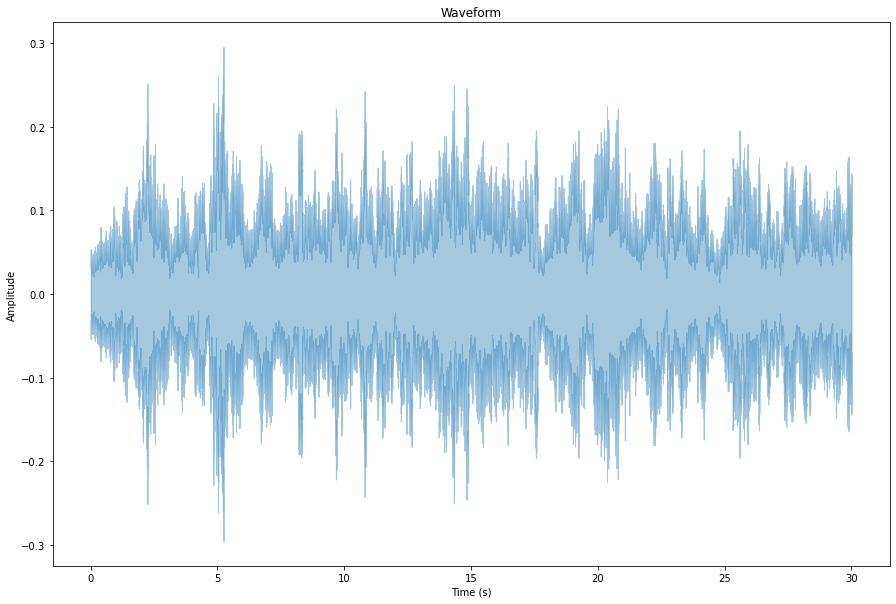

In [21]:

# WAVEFORM
# display waveform
plt.figure(figsize=FIG_SIZE)
librosa.display.waveshow(signal, sample_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

In [22]:
ipd.Audio(classical_file)

In [23]:
## we are reading the samples with 22050 per second

In [24]:
sample_rate

22050

In [25]:
## we got values the position of particles at instantaneous time in a normalized way by using librosa library.

In [26]:
signal

array([-0.01077271, -0.02001953, -0.02426147, ..., -0.10516357,
       -0.11056519, -0.09179688], dtype=float32)

In [28]:
# FFT -> power spectrum
# perform Fourier transform
fft = np.fft.fft(signal)

In [29]:
# calculate abs values on complex numbers to get magnitude
spectrum = np.abs(fft)

In [30]:
# create frequency variable
f = np.linspace(0, sample_rate, len(spectrum))


Text(0.5, 1.0, 'Power Spectrum')

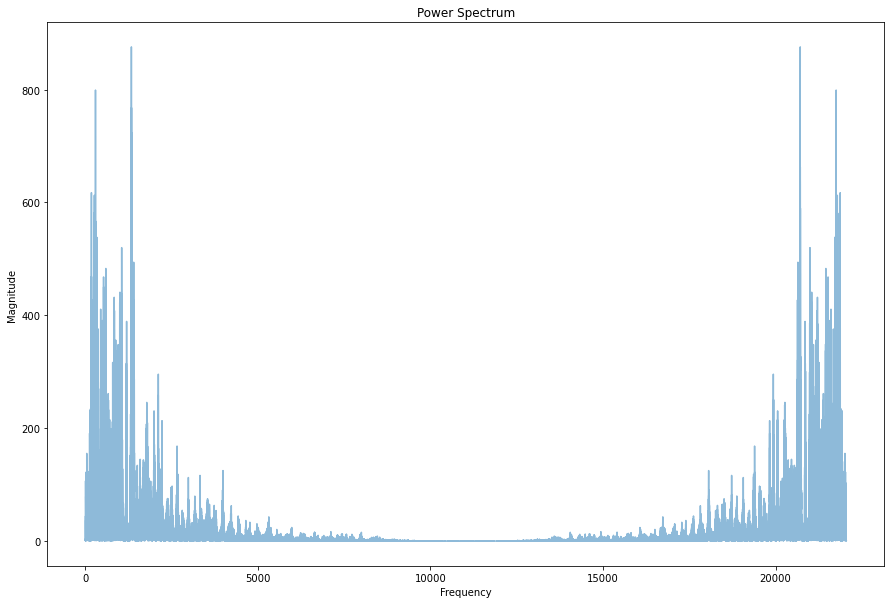

In [31]:
# Plot Spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(f, spectrum, alpha=0.5)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power Spectrum")

In [32]:
# Take half of the spectrum and frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

Text(0.5, 1.0, 'Power Spectrum')

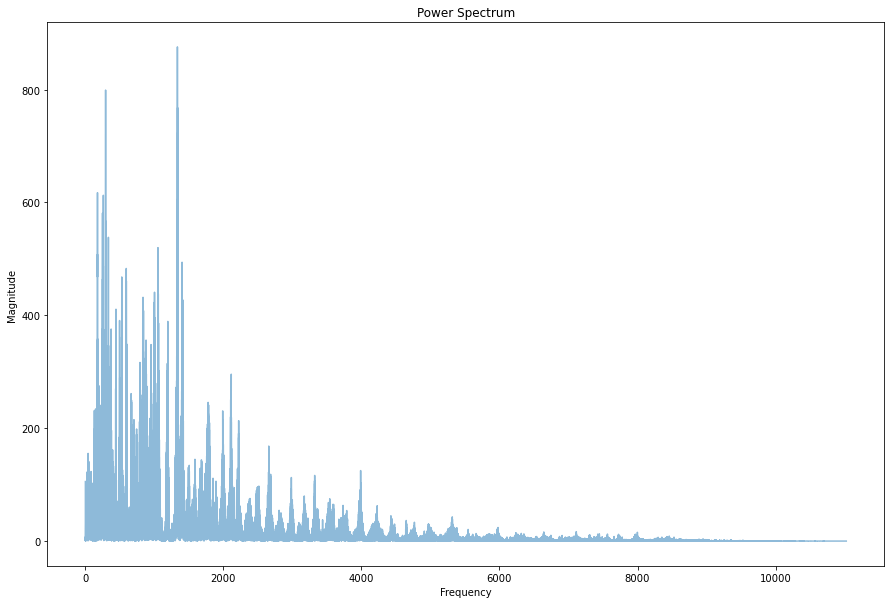

In [33]:
# Plot Spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha=0.5)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power Spectrum")

In [34]:
# Spectrogram (STFT)
hop_length = 512 # num. of samples
n_fft = 2048 # num. of samples for window

In [35]:
# Perform STFT
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

In [36]:
# Calculate the Magnitude (abs values on complex numbers)
spectrogram = np.abs(stft)

Text(0.5, 1.0, 'Spectrogram')

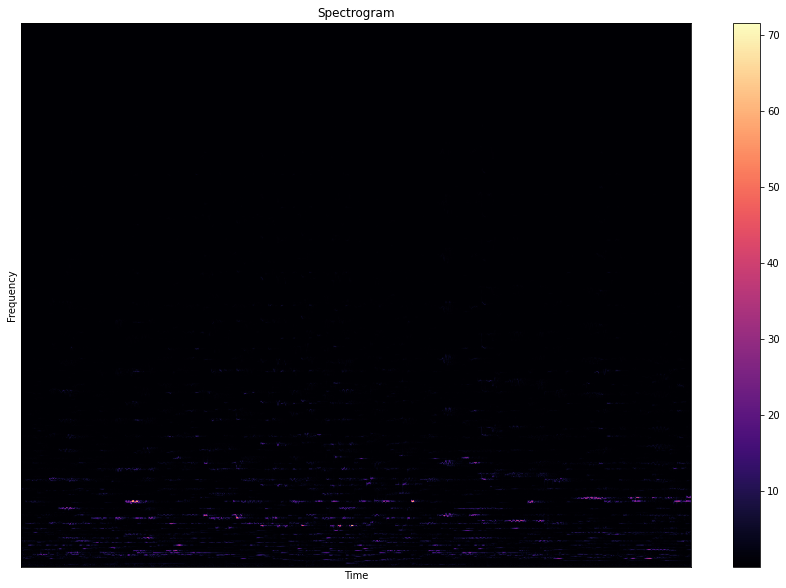

In [37]:
# Plot the Spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

In [38]:
# Apply Logarithm to get values in Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

Text(0.5, 1.0, 'Spectrogram (dB)')

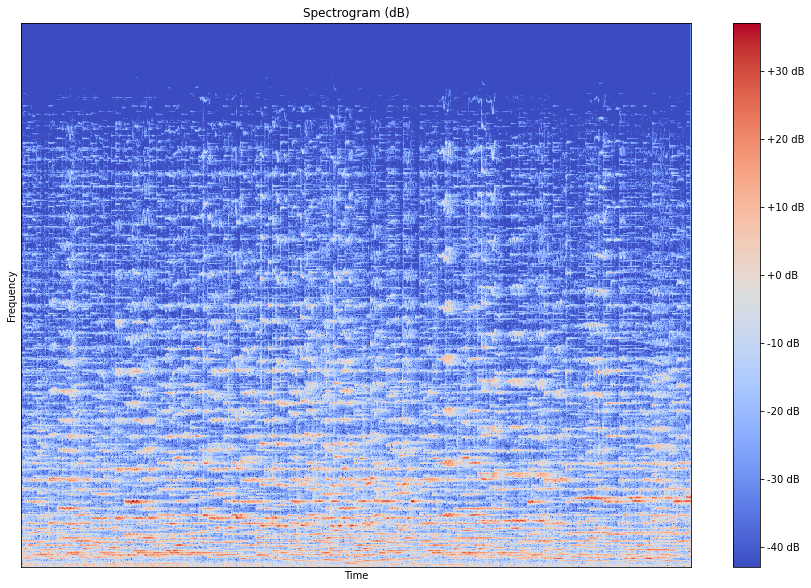

In [39]:
# Plot the Spectrogram in Decibels
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

In [40]:
# MFCCs (we use 20 MFCCs)
MFCCs = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=20)

Text(0.5, 1.0, 'MFCCs')

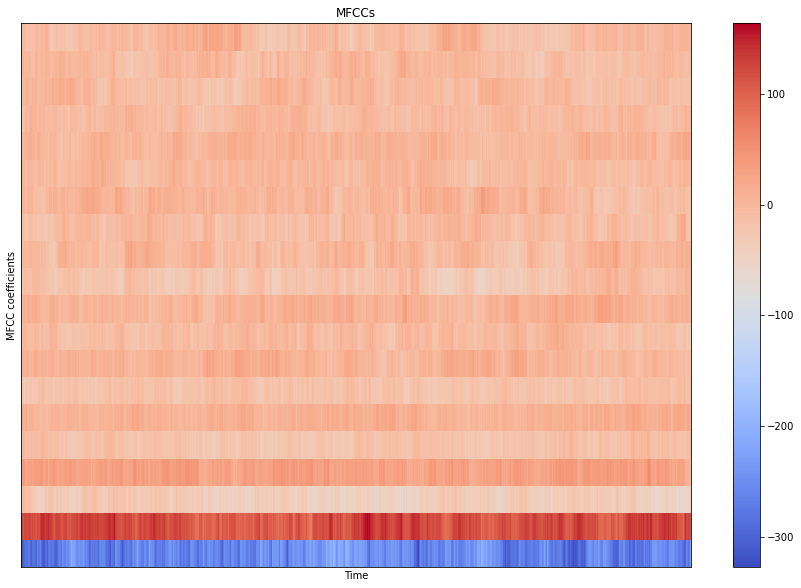

In [41]:
# Plot MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")